In [8]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import seaborn as sns
import matplotlib.pyplot as plt

# Using Automated EDA

In [54]:
class automatedExploratory:
    
    def __init__(self,df):
        self.df = df
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt 
        import seaborn as sns
        from scipy.stats import kurtosis
        from scipy.stats import skew
        import math
        import matplotlib as mpl
        
        self.np = np
        self.pd = pd
        self.plt = plt
        self.sns = sns
        self.skew = skew
        self.math = math
        self.mpl = mpl
        
        from IPython.core.display import HTML
        self.HTML = HTML
        
   
        
        
    def dataExploration(self):
        
        print('\t'*5,"Exploratory Analysis \n",'\t'*4,"-"*35)
            
        
        print('Shape:\n',self.df.shape,'\n','-'*30)
        print('Data Types:\n',self.df.dtypes,'\n','-'*30)
        print('Head:\n',self.df.head(),'\n','-'*30)
        print('Tail:\n',self.df.tail(),'\n','-'*30)
        print('Summary Statistics:\n',self.df.describe(),'\n','-'*30)
        print('Missing Value %:\n',self.df.isnull().mean(),'\n','-'*30) 
        
        
    def targetAnalysis(self,tColumn):
        
        self.plt.show()
        print('\t'*5,"Univariate Analysis for Features \n",'\t'*5,"-"*32)
            
        
        #setting seaborn Style
        self.sns.set_style('darkgrid')
        self.plt.figure(figsize = (20, 15))

        #Checking if the target column is type object and converting to float for Regression if so
        if self.df[tColumn].dtype == object:
            self.df[tColumn] = float(self.df[tColumn])

        #Plotting histogram
        ax = self.plt.subplot(2, 2, 1)
        self.sns.histplot(self.df[tColumn],kde=True)
        self.plt.xlabel(tColumn, fontsize = 15)
#         self.plt.barh(self.df[tColumn],width=15)
        

        #Checking the Skweness
        skewness = self.skew(self.df[tColumn])
        print('Skewness: ',skewness)
        
        #Perform Log Transform to remove Skewness
        if skewness >1 or skewness <-1:
            df['Log Transformed Target'] = self.np.log(df[tColumn])
            self.sns.histplot(data=self.df['Log Transformed Target'],kde=True)
            ax = self.plt.subplot(2, 2, 2)
            self.sns.histplot(self.df['Log Transformed Target'],kde=True)
            self.plt.xlabel('Log Transformed Target', fontsize = 15)
            
        # Boxplots   
        self.plt.figure(figsize=(20,15))
        ax = self.plt.subplot(2, 2, 1)
        self.sns.boxplot(data=df[tColumn])
        self.plt.xlabel(tColumn, fontsize = 15)
        ax = self.plt.subplot(2, 2, 2)
        self.sns.boxplot(data=df['Log Transformed Target'])
        self.plt.xlabel('Log Transformed Target', fontsize = 15)
        
    def featureAnalysis(self):
        
        self.plt.show()
        print('\t'*5,"Multivariate Analysis for Features \n",'\t'*5,"-"*35)

        #Dropping categorical Columns
        df2 = self.df.select_dtypes(exclude='object')
        # df2 = df2.drop(['charges','children','Log Transformed Target'],axis=1)
        
        height = int(df2.shape[1]/3)*8
        
        self.plt.figure(figsize = (20, height))
        numOfRows = self.math.ceil(df2.shape[1]/3)
        plotnumber = 1
        
        #Histrograms
        for column in df2:
            if plotnumber <= 14:
                ax = self.plt.subplot(numOfRows, 3, plotnumber)
                self.sns.histplot(df2[column],kde=True,)
                self.plt.xlabel(column, fontsize = 15)

            plotnumber += 1
        
        #Boxplots
        height = int(df2.shape[1]/3)*8
        
        self.plt.figure(figsize = (20, height))
        numOfRows = self.math.ceil(df2.shape[1]/3)
        plotnumber = 1
        
        for column in df2:
            if plotnumber <= 14:
                ax = self.plt.subplot(numOfRows, 3, plotnumber)
                self.sns.boxplot(df2[column])
                self.plt.xlabel(column, fontsize = 15)

            plotnumber += 1
        
        
        #PairPlot
        self.mpl.rcParams["axes.labelsize"] = 15
        g = self.sns.PairGrid(df2)
        g.map(self.sns.scatterplot)
        
        #Heatmap
        self.HTML("""
        <style>
        .output_png {
            display: table-cell;
            text-align: center;
            vertical-align: middle;
        }
        </style>
        """)
        self.mpl.rcParams["axes.labelsize"] = 8
        width,height = int(df2.shape[1])*2, int(df2.shape[1])
        
        self.plt.figure(figsize = (width, height))
        
        ax = self.sns.heatmap(df2.corr(), 
                 annot=True, 
                 annot_kws={'size':10}, 
                )

					 Exploratory Analysis 
 				 -----------------------------------
Shape:
 (214, 10) 
 ------------------------------
Data Types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object 
 ------------------------------
Head:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 
 ------------------------------
Tail:
           RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  

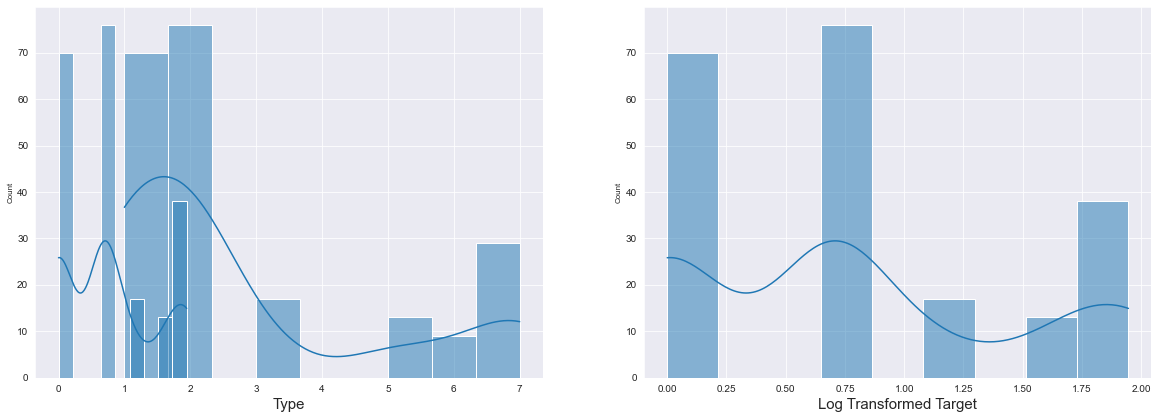

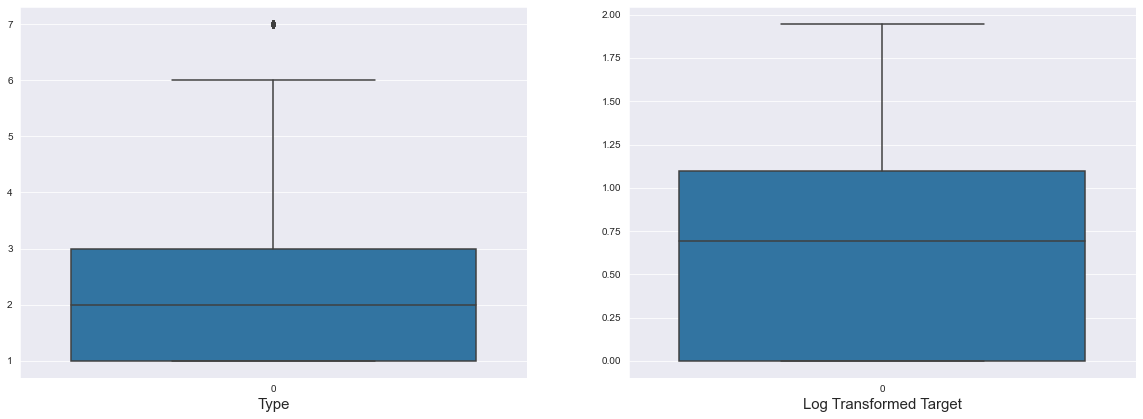

					 Multivariate Analysis for Features 
 					 -----------------------------------


/Users/thejakamahaulpatha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thejakamahaulpatha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/thejakamahaulpatha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

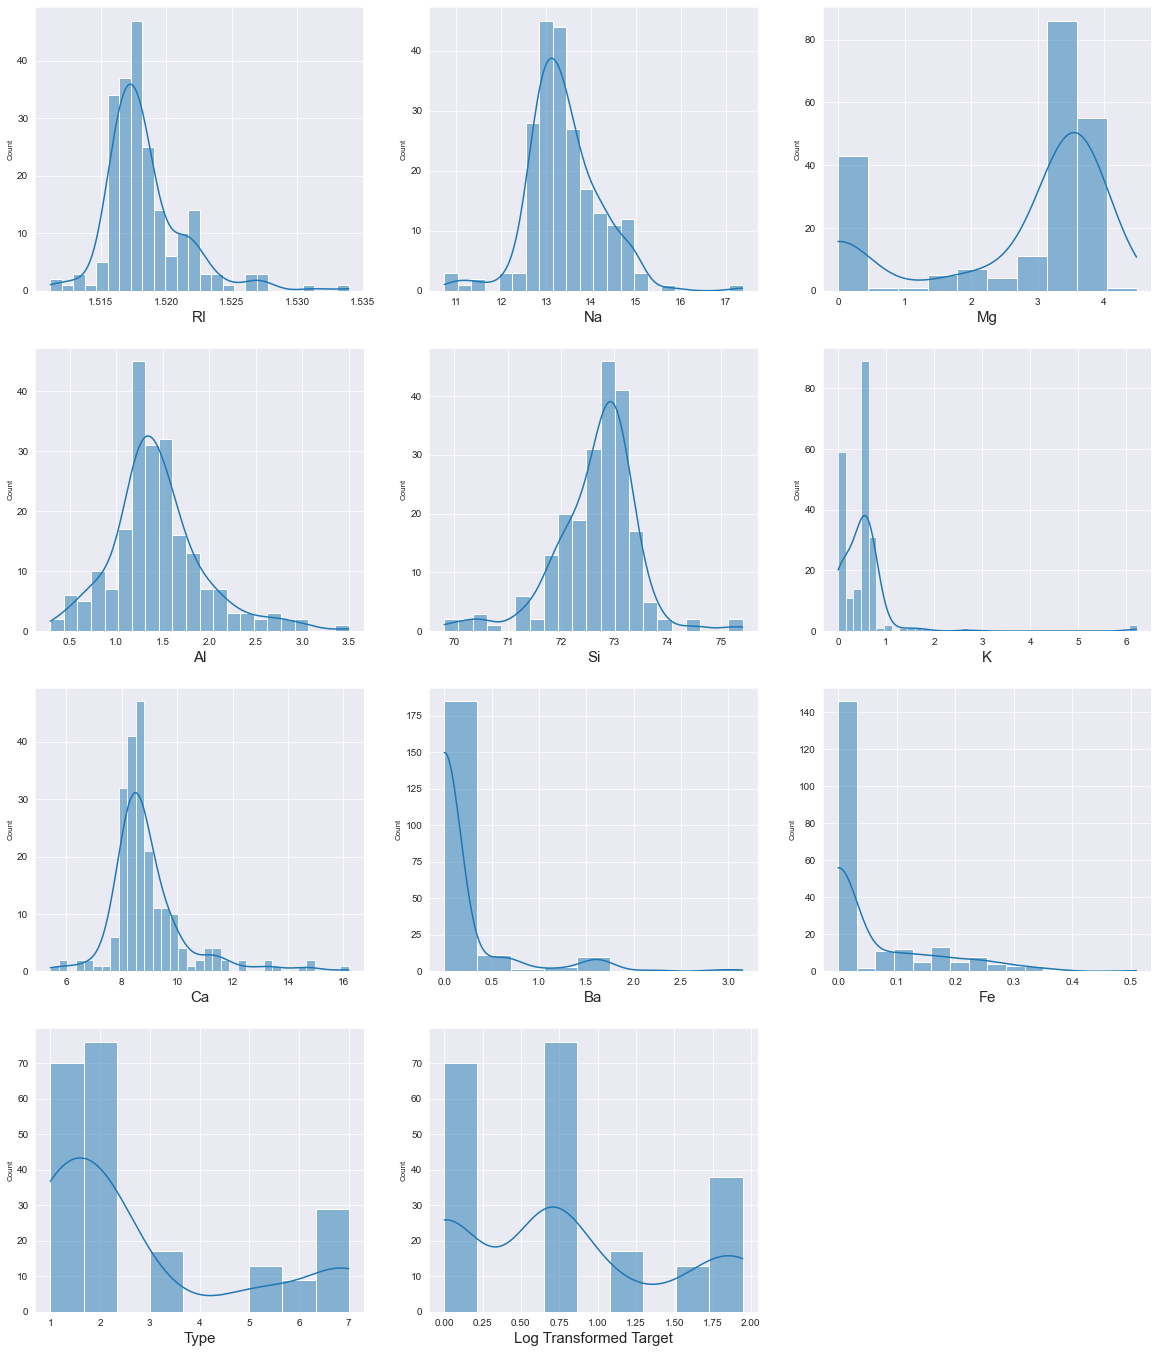

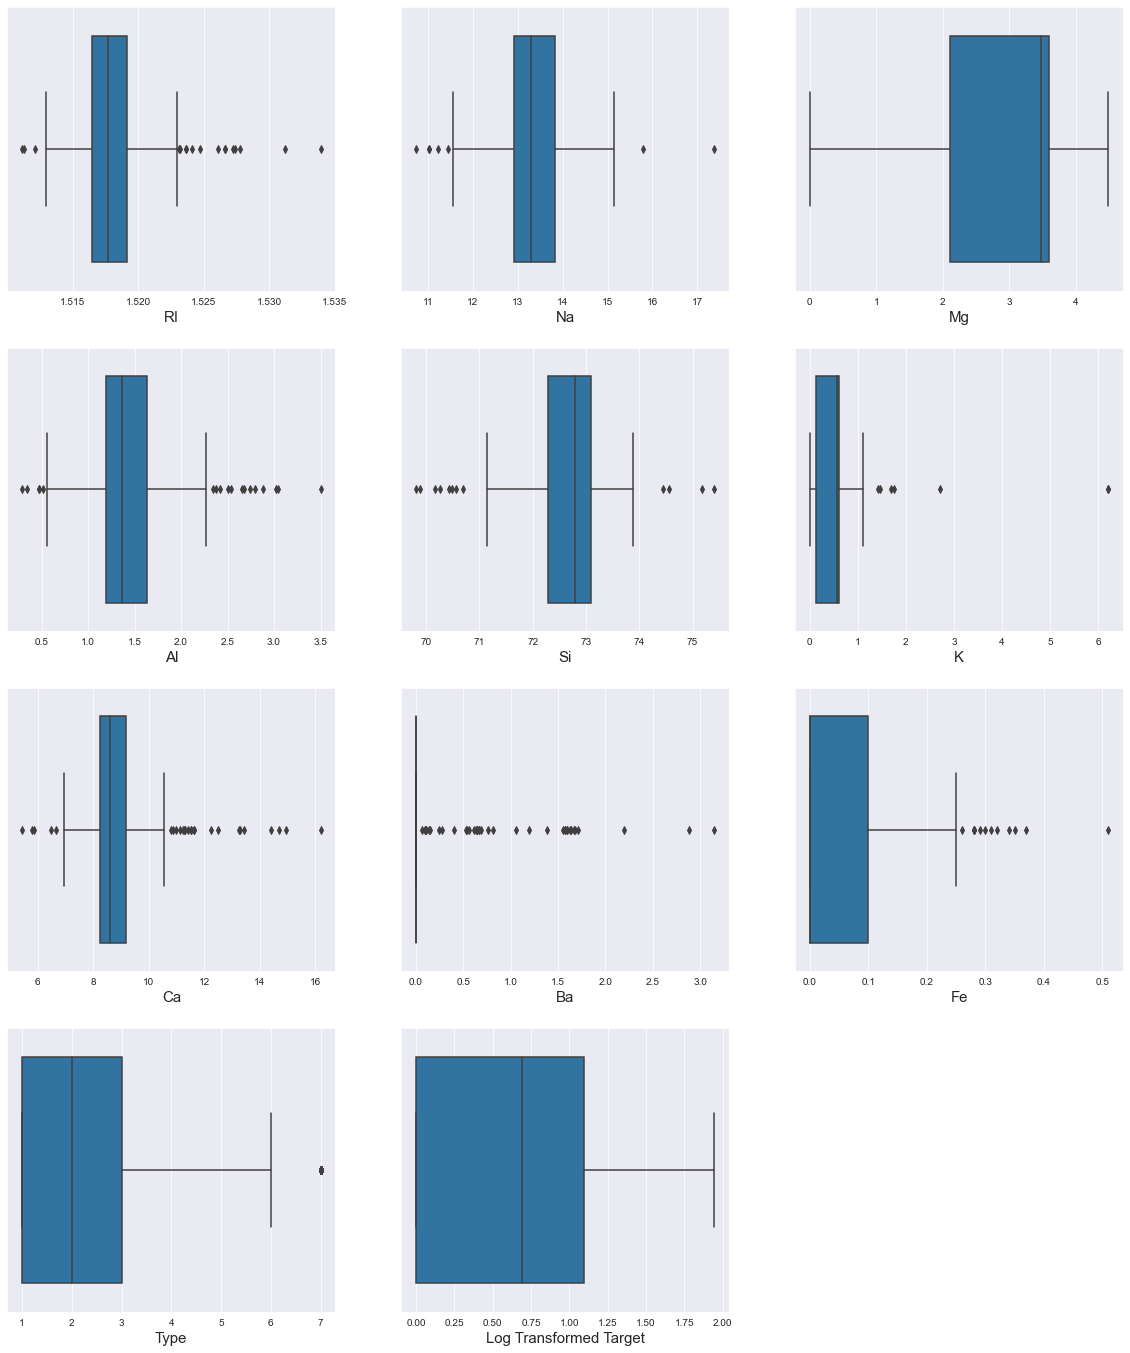

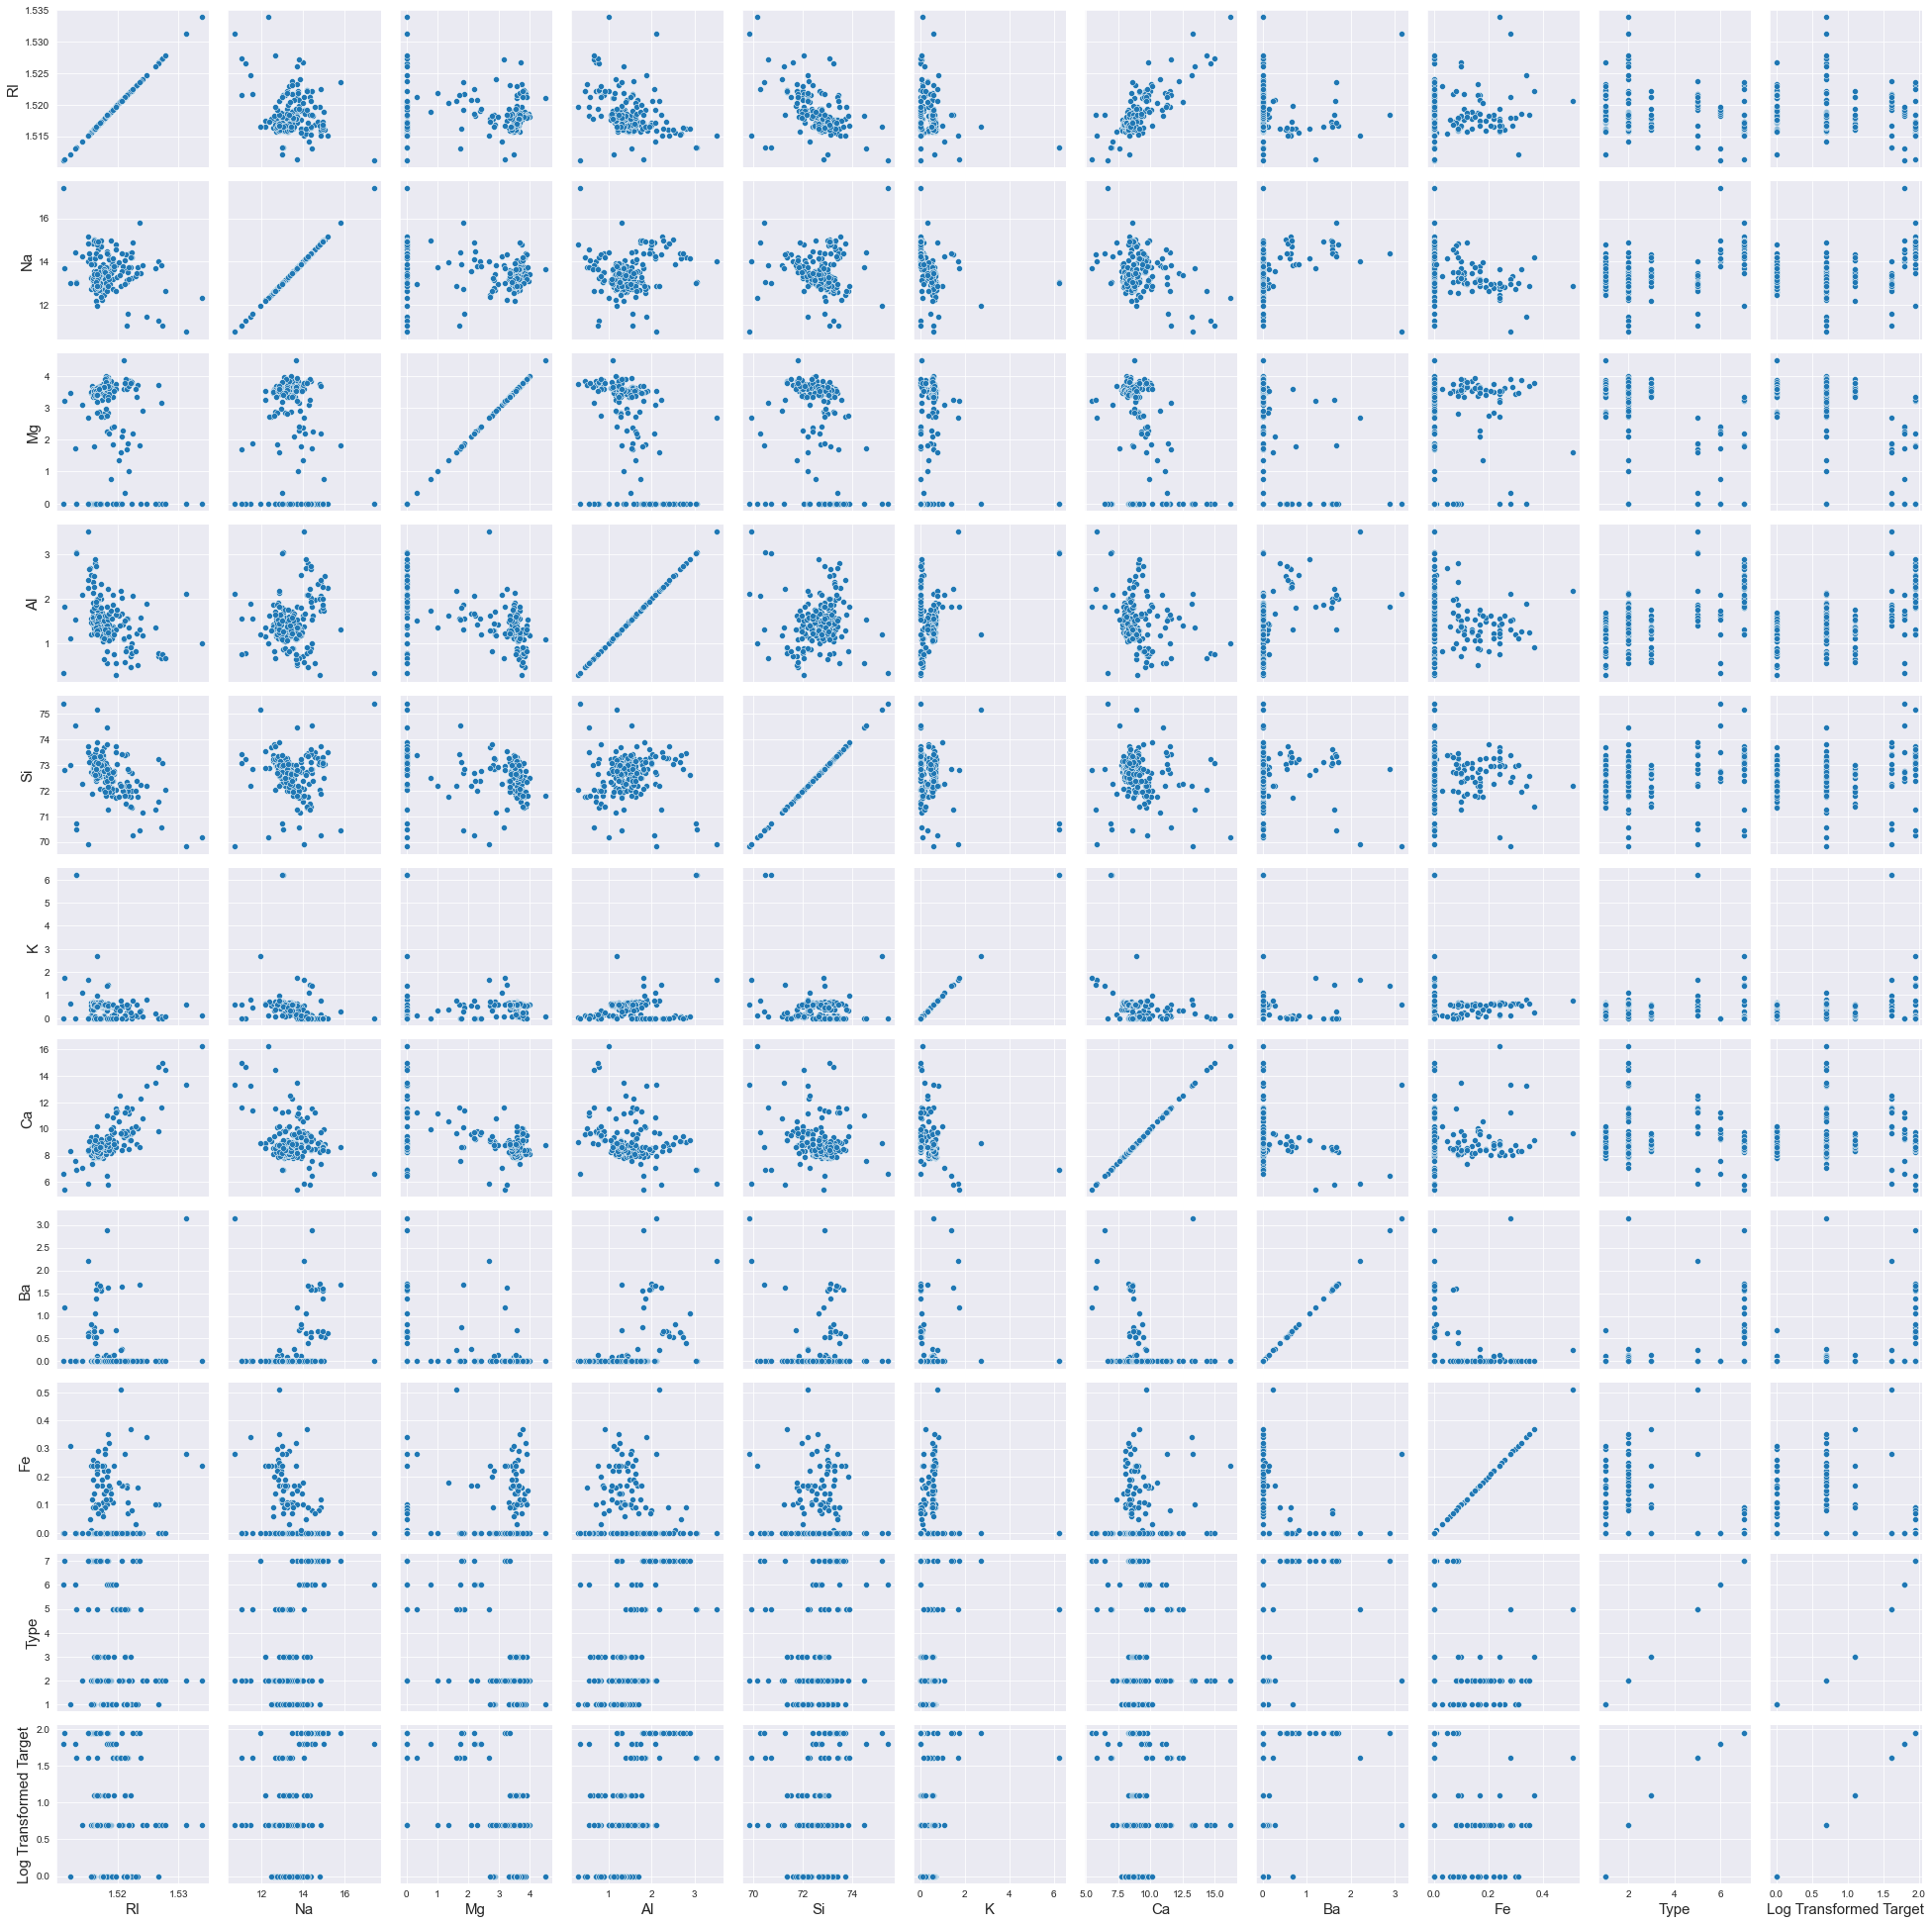

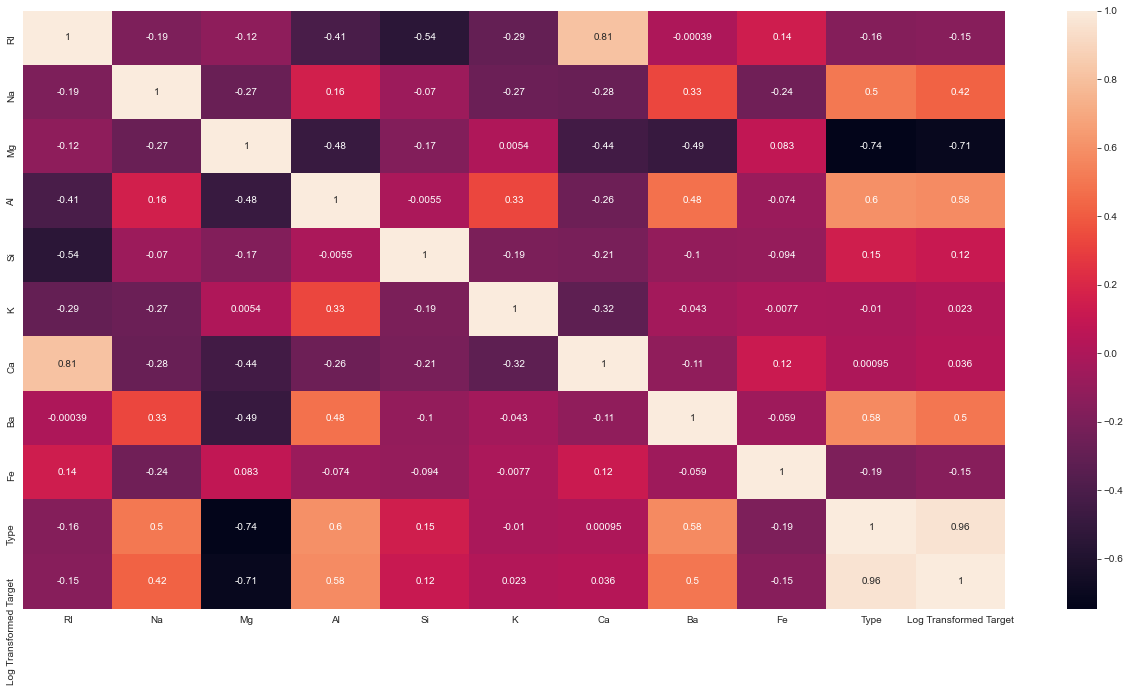

In [55]:
df = pd.read_csv('glass.csv')
df.columns = df.columns.str.strip()
target = 'Type'

obj = automatedExploratory(df)

obj.dataExploration()
obj.targetAnalysis(target)
obj.featureAnalysis()


# Model Fitting

In [24]:
X = df.drop(['Type','Log Transformed Target'],axis=1)
y = df['Type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [31]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              1     2     3    5    6     7  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0  1.0  1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0  1.0  1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0  1.0  1.0   1.0       1.0        1.0           1.0
support    59.0  62.0  14.0  9.0  6.0  21.0       1.0      171.0         171.0
_______________________________________________
Confusion Matrix: 
 [[59  0  0  0  0  0]
 [ 0 62  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 21]]

Test Result:
Accuracy Score: 72.09%
_______________________________________________
CLASSIFICATION REPORT:
                   1          2     3         5         6         7  accuracy  \
precision   0.714286   0.636364  0.60  0.500000  1.000000  0.888889   0.72093   
recall      0.909091   0.500000

### Predicting output for desired row

In [47]:
X_test.shape
print(model.predict(X_test.iloc[6:7,]))

[1]
